In [1]:
import os
import sys
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import datetime
import matplotlib as mpl
import warnings 
import time
import random
from scipy import stats
warnings.filterwarnings('ignore')
np.random.seed(42)

FONTSIZE=11
print("All packages imported!")

All packages imported!


In [2]:
prePandemic = [None]*12
for i in range(3,12):
    if i <9:
        filepath=os.path.join(os.getcwd(),'datasets','2019','0'+str(i+1)+'.csv')
    else:
        filepath=os.path.join(os.getcwd(),'datasets','2019',str(i+1)+'.csv')
    prePandemic[i-3] = pd.read_csv(filepath)
for i in range(0,3):
    filepath=os.path.join(os.getcwd(),'datasets','2020','0'+str(i+1)+'.csv')
    prePandemic[i+9] = pd.read_csv(filepath)
    
afterPandemic = [None]*12
for i in range(3,12):
    if i <9:
        filepath=os.path.join(os.getcwd(),'datasets','2020','0'+str(i+1)+'.csv')
    else:
        filepath=os.path.join(os.getcwd(),'datasets','2020',str(i+1)+'.csv')
    afterPandemic[i-3] = pd.read_csv(filepath)
for i in range(0,3):
    filepath=os.path.join(os.getcwd(),'datasets','2021','0'+str(i+1)+'.csv')
    afterPandemic[i+9] = pd.read_csv(filepath)
afterPandemic[0].head()

filepath=os.path.join(os.getcwd(),'datasets','daily_cumulative_cases.csv')
covidCases = pd.read_csv(filepath)
covidCases.drop('Country',axis=1,inplace=True)

prePandemicAll = pd.concat([prePandemic[i] for i in range(12)],axis=0)
afterPandemicAll = pd.concat([afterPandemic[i] for i in range(12)],axis=0)

In [3]:
prePandemicLite = prePandemicAll.loc[:,["started_at","duration"]]
prePandemicLite["started_at"]=prePandemicLite["started_at"].apply(lambda x : x[:10])
prePandemicLite=prePandemicLite.groupby("started_at",as_index=False)
prePandemicLite=pd.concat([prePandemicLite.agg({"duration":"mean"}),prePandemicLite.agg({"duration":"count"}).rename(columns={'duration':"count"})["count"]],axis=1)

afterPandemicLite = afterPandemicAll.loc[:,["started_at","duration"]]
afterPandemicLite["started_at"]=afterPandemicLite["started_at"].apply(lambda x : x[:10])
afterPandemicLite=afterPandemicLite.groupby("started_at",as_index=False)
afterPandemicLite=pd.concat([afterPandemicLite.agg({"duration":"mean"}),afterPandemicLite.agg({"duration":"count"}).rename(columns={'duration':"count"})["count"]],axis=1)
covidCases['Date']=covidCases['Date'].apply(str).apply(lambda x: x[:4]+'-'+x[4:6]+'-'+x[6:])

In [4]:
result = afterPandemicLite.merge(covidCases,left_on='started_at',right_on='Date',how='inner')
print("The correlation between daily new cases and number of rides on that day is ",end='')
print(round(result['count'].corr(result['DailyCases']),3))

The correlation between daily new cases and number of rides on that day is -0.617


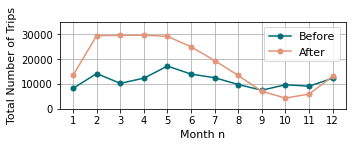

In [5]:
output1=[prePandemic[i].shape[0] for i in range(12)]
output2=[afterPandemic[i].shape[0] for i in range(12)]
    
plt.figure(figsize=(5,2))
#plt.title('Comparison of Number of Cycle Hire Trips Per Months Before and After Pandemic',fontsize=16)
plt.xlabel('Month n',fontsize=FONTSIZE)
plt.ylabel('Total Number of Trips',fontsize=FONTSIZE)
plt.ylim([0,35000])
plt.grid(b=True, which='major', axis='both')
plt.plot(range(12),output1,marker='o',ms=5,c='#006d77',label='Before')
plt.plot(range(12),output2,marker='o',ms=5,c='#e29578',label='After')
plt.legend(prop={'size': FONTSIZE})
plt.xticks(range(12),[str(i) for i in range(1,13)])
plt.tight_layout()
plt.savefig('ridesFigure.png')
plt.show()

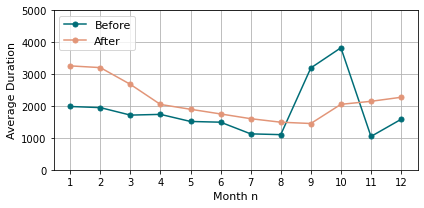

In [12]:
output1=[prePandemic[i]["duration"].sum()/prePandemic[i].shape[0] for i in range(12)]
output2=[afterPandemic[i]["duration"].sum()/afterPandemic[i].shape[0] for i in range(12)]
    
plt.figure(figsize=(6,3))
#plt.title('Comparison of Average Cycle Hire Duration Per Month Before and After Pandemic',fontsize=16)
plt.xlabel('Month n',fontsize=FONTSIZE)
plt.ylabel('Average Duration',fontsize=FONTSIZE)
plt.ylim([0,5000])
plt.grid(b=True, which='major', axis='both')
plt.plot(range(12),output1,marker='o',ms=5,c='#006d77',label='Before')
plt.plot(range(12),output2,marker='o',ms=5,c='#e29578',label='After')
plt.legend(prop={'size': FONTSIZE})
plt.xticks(range(12),[str(i) for i in range(1,13)])
plt.tight_layout()
plt.savefig('durationFigure.png')
plt.show()

In [7]:
k = 10000
x_star_tilde_duration = np.zeros(k)
x_star_tilde_count = np.zeros(k)
for i in range(k):
    x1_star_duration = prePandemicLite["duration"].sample(2000,replace = True)
    x2_star_duration = afterPandemicLite["duration"].sample(2000,replace = True)
    x1_star_count = prePandemicLite["count"].sample(2000,replace = True)
    x2_star_count = afterPandemicLite["count"].sample(2000,replace = True)
    x_star_tilde_duration[i] = x1_star_duration.mean() - x2_star_duration.mean()
    x_star_tilde_count[i] = x1_star_count.mean()-x2_star_count.mean()

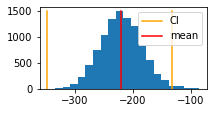

Confidence interval
0.00   -347.931045
0.99   -133.040281
dtype: float64
Mean
-219.8087616035422


In [8]:
plt.figure(figsize=(3,1.5))
plt.hist(x_star_tilde_duration, 20)
plt.plot([pd.Series(x_star_tilde_duration).quantile(0),pd.Series(x_star_tilde_duration).quantile(0)],[0,1500],c='orange',label='CI')     
plt.plot([pd.Series(x_star_tilde_duration).quantile(0.99),pd.Series(x_star_tilde_duration).quantile(0.99)],[0,1500],c='orange')     
plt.plot([pd.Series(x_star_tilde_duration).mean(),pd.Series(x_star_tilde_duration).mean()],[0,1500],c='red',label='mean')
plt.legend()
#plt.title("Bootstrap simulation of A/B test on average duration per day")
plt.savefig('ab2.png')
plt.show()
print("Confidence interval")
print(pd.Series(x_star_tilde_duration).quantile([0, 0.99]))
print("Mean")
print(pd.Series(x_star_tilde_duration).mean())


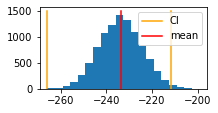

Confidence interval
0.00   -266.009000
0.99   -211.839405
dtype: float64
Mean
-233.8329440999996


In [9]:
plt.figure(figsize=(3,1.5))
plt.hist(x_star_tilde_count, 20)
plt.plot([pd.Series(x_star_tilde_count).quantile(0),pd.Series(x_star_tilde_count).quantile(0)],[0,1500],c='orange',label='CI')     
plt.plot([pd.Series(x_star_tilde_count).quantile(0.99),pd.Series(x_star_tilde_count).quantile(0.99)],[0,1500],c='orange')     
plt.plot([pd.Series(x_star_tilde_count).mean(),pd.Series(x_star_tilde_count).mean()],[0,1500],c='red',label='mean')    
#plt.title("Bootstrap simulation of A/B test on number of rides per day")
plt.legend()
plt.savefig('ab1.png')
plt.show()
print("Confidence interval")
print(pd.Series(x_star_tilde_count).quantile([0, 0.99]))
print("Mean")
print(pd.Series(x_star_tilde_count).mean())


In [10]:
routesBefore=prePandemicAll[prePandemicAll['start_station_id']!=prePandemicAll['end_station_id']].groupby(['start_station_id','end_station_id','start_station_latitude','start_station_longitude','end_station_latitude','end_station_longitude']).size().reset_index(name='count')
index = routesBefore.index
for i in range(len(routesBefore)):
    startStation=routesBefore.iloc[i]['start_station_id']
    endStation=routesBefore.iloc[i]['end_station_id']
    x=index[(routesBefore['start_station_id']==endStation) & (routesBefore['end_station_id']==startStation) ].tolist()
    if len(x)>0:
        routesBefore.loc[i,'count']+=routesBefore.iloc[x[0]]['count']
        routesBefore.loc[x[0],'count']=0

routesAfter=afterPandemicAll[afterPandemicAll['start_station_id']!=afterPandemicAll['end_station_id']].groupby(['start_station_id','end_station_id','start_station_latitude','start_station_longitude','end_station_latitude','end_station_longitude']).size().reset_index(name='count')
index = routesAfter.index
for i in range(len(routesAfter)):
    startStation=routesAfter.iloc[i]['start_station_id']
    endStation=routesAfter.iloc[i]['end_station_id']
    x=index[(routesAfter['start_station_id']==endStation) & (routesAfter['end_station_id']==startStation) ].tolist()
    if len(x)>0:
        routesAfter.loc[i,'count']+=routesAfter.iloc[x[0]]['count']
        routesAfter.loc[x[0],'count']=0

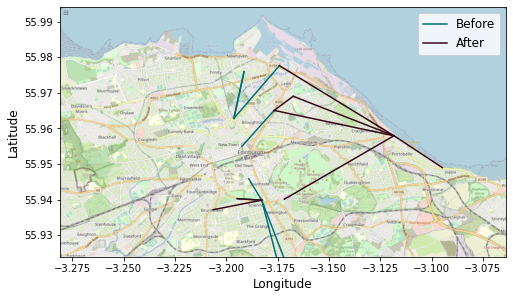

In [11]:
routesBefore=routesBefore.sort_values('count',ascending=False).head(8)
routesAfter=routesAfter.sort_values('count',ascending=False).head(8)
BBox=(-3.2810,-3.0636,55.9239,55.9941)
filepath=os.path.join(os.getcwd(),'datasets','EdinburghMap.png')
ruh_m = plt.imread(filepath)
fig, ax = plt.subplots(figsize = (8,8))
ax.plot([routesBefore['start_station_longitude'],routesBefore['end_station_longitude']],[routesBefore['start_station_latitude'],routesBefore['end_station_latitude']],c='#006d77',label='Before')
ax.plot([routesAfter['start_station_longitude'],routesAfter['end_station_longitude']],[routesAfter['start_station_latitude'],routesAfter['end_station_latitude']],c='#370617',label='After')
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
ax.legend(by_label.values(), by_label.keys(),prop={'size': FONTSIZE+1})
#ax.set_title('Top 8 Popular Routes Before and After Pandemic',fontsize=FONTSIZE)
ax.set_xlabel('Longitude',fontsize=FONTSIZE+1)
ax.set_ylabel('Latitude',fontsize=FONTSIZE+1)
ax.set_xlim(BBox[0],BBox[1])
ax.set_ylim(BBox[2],BBox[3])
ax.imshow(ruh_m, zorder=0, extent = BBox, aspect= 1.733)